# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [61]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [33]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [34]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [35]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/ahipolito94/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


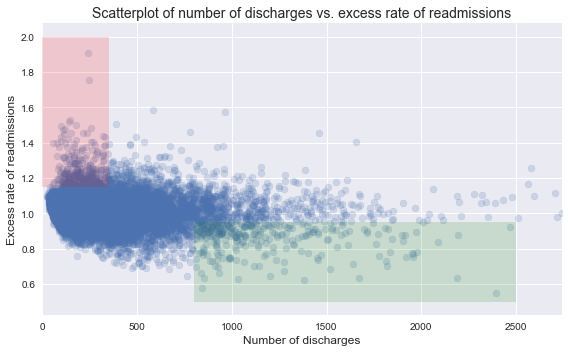

In [36]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

<u>What I Don't Agree With:</u></br>

- **Data Wrangling**: Although the preliminary analysis does deal with some missing data ('Number of Discharges'), it fails to deal with missing data in other fields such as 'Expected Readmission Rate'. As you can see from clean_hospital_read_df.info() below, there are 11578 entires, however 'Excess Readmission Ratio' only has 11497, meaning it contains null values.


- **Analysis**: The report bases its entire analysis from one scatterplot, it is missing statistical analysis to back up its conclusions. The analysis concludes that there is a "significant correlation" between hospital capacity (number of discharges) and readmission rates without any statistical confirmation. Also, the report is unclear on its definitions of what is "small". In the **statistics** section, number of discharges < 100 is small, but in the **recommendations** section, number of discharges < 300 is small. The report should be more consistent, it should include more statistical analysis, and an actual hypothesis test in order to provide legitimate recommendations.

In [37]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


<hr>
## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  α  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
 - What are the advantages and disadvantages of using this plot to convey information?
 - Construct another plot that conveys the same information in a more direct manner.


### 0. Before setting up Hypothesis test, Clean the data

In [46]:
# NaN values in 'Excess Readmission Ratio' column
really_clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
really_clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### 1. Setup an appropriate hypothesis test.

$H$o: There is no significant correlation between hospital capacity (number of discharges) and readmission rates.
<br>
$H$a: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.


### 2. Compute and report the observed significance value (or p-value).

From the regression line in the scatterplot below, we see that there is a negative correlation between the number of discharges and the excess readmission ratio. **The correlation coefficient is -0.097 and the p-value is significant at 1.2e-25 < 0.05, we can reject $H$o and accept $H$a.**

Even though the regression line does show a negative relationship and the p-value does indicate a statistical significance, because the correlation coefficient is so close to zero, I cannot say that there is a strong relationship between the number of discharges and the excess readmission ratio. 

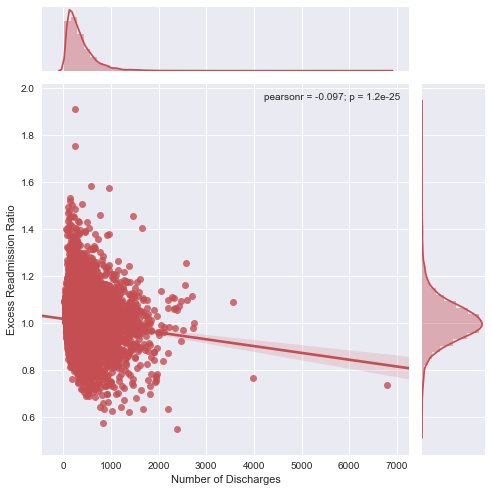

In [64]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=really_clean_hospital_read_df,
              kind='reg', color='r', size=7)
plt.show()


### 3. Report statistical significance for  α  = .01.

Since p-value = 1.2e-25 < 0.01, the statistical significance is the same as when  α = .05.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistically, my analysis above does show that there is a significance between the number of discharges and the excess readmission ratio, therefore the $H$o can be rejected. However, because the correlation coefficient is so close to zero, I cannot say that there is a strong correlation between the two. So practically speaking, there is a weak relationship between the number of discharges and the excess readmission ratio. So even though there is statistical significance, there is not much practical significance. 

Because of this lack of practical significance, I would not recommend that smaller hospitals should be required to demonstrate upgraded resource allocation for quality care to continue operation. The data and my analysis does not support the need to take steps in reducing excess readmission.

### 5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

In the scatterplot in the analysis above, it's difficult to see what kind of relationship the number of discharges and the excess readmission ratio has. In my scatterplot above, the addition of a regression line and correlation coefficient clearly indicate the slight negative relationship between the two. 
